In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import plotly.express as px

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
print(df.shape)
df.head()

(306, 4)


,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


- We have data for 306 patients. Data available is age of patient, operation year, no. of cancer nodes at the time of operation and their survival status

- Survival status of 1 indicates that patient survived more than 5 years after operation and 2 indicates patient died within 5 years after operation.

- Below analysing what role age, no. of nodes have on survival status.

- Have used chi-square statistical test and build confidence interval to give proper sense to observations made.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
print('patients with survival status = 1:',df.survival_status.value_counts().values[0])
print('patients with survival status = 2:',df.survival_status.value_counts().values[1])

patients with survival status = 1: 225
patients with survival status = 2: 81


In [ ]:
df.age.describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

In [ ]:
df.operation_Year.describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: operation_Year, dtype: float64

In [ ]:
df.axil_nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64

Analysing Age:

In [ ]:
sns.set_style("whitegrid")

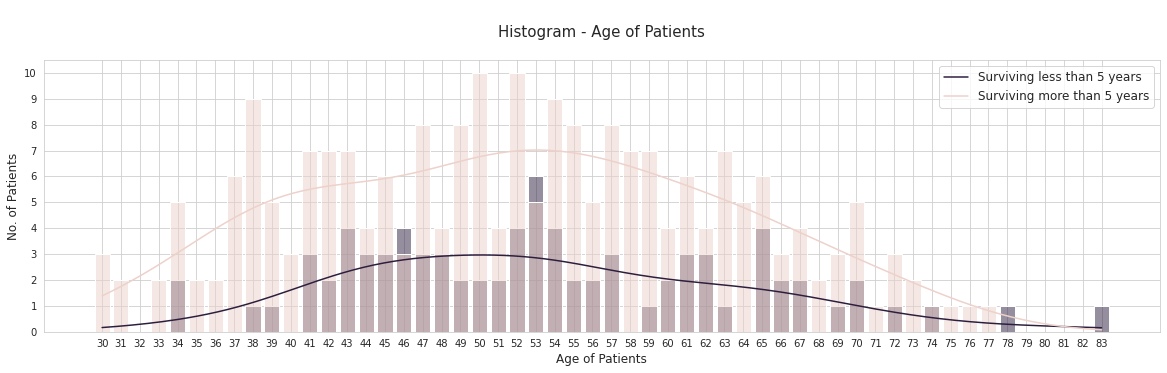

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(x=df.age , hue=df.survival_status , kde=True , binwidth=1 , shrink=.8 , discrete=True)
plt.xticks(np.arange(df.age.min(),df.age.max()+1))
plt.yticks(np.arange(0,11))
plt.xlabel('Age of Patients', fontsize=12)
plt.ylabel('No. of Patients', fontsize=12)
plt.legend(labels=['Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=12)
plt.title('\nHistogram - Age of Patients\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>
1.   From above plot it seems that patients with age less than 40 have good chances of survival.
2. Below we try to get statistical numbers to verify the observation. (later we get to see that we have more confidence on data for age more than 40 with less no. of nodes compared to age less than 40 based on data available)

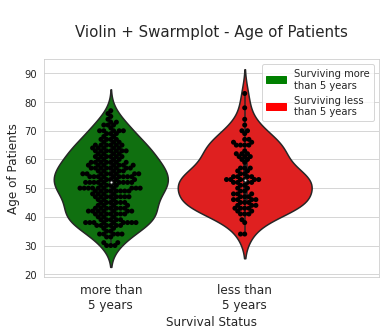

In [ ]:
sns.swarmplot(x=df.survival_status,y=df.age,color='black')
sns.violinplot(x=df.survival_status,y=df.age,width=1, palette=['g','r'])
plt.ylabel('Age of Patients',fontsize=12)
plt.xlabel('Survival Status', fontsize=12)
plt.xticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years')
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch])
plt.title('\nViolin + Swarmplot - Age of Patients\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. For Survival status of more than 5 years we see higher concentration of points in low age group(age<40) compared to other survival status. i.e same observation as above plot.

Below performing chi-square test by dividing data into two categories(age<42 & age>=42) to find whether survival status is dependent on this two age categories.

In [ ]:
def chi_square_test(category):
  '''calculates observed freuency table based on category and gives chi-square statistics using scipy.stats chi2_contingency function'''
  obs=[]  #observed frequency
  obs.append(category['survival_status'].value_counts().values[0])
  obs.append(df.survival_status.value_counts().values[0]-obs[0])   
  obs.append(category['survival_status'].value_counts().values[1])   
  obs.append(df.survival_status.value_counts().values[1]-obs[2])
  obs=np.array(obs).reshape(2,2) #observed frequency table

  p_value = chi2_contingency(obs)[1]

  return obs , p_value


In [ ]:
def confidence_interval(category):
  '''calculates confidence interval using permutation test'''
  survival_status = category['survival_status'].values
  survival_rate = (survival_status==1).sum()/len(survival_status)*100
  a=[(([survival_status[int(np.random.uniform(len(survival_status)))] for i in range(len(survival_status))].count(1))/len(survival_status)) for j in range(1000)]
  a.sort()

  return np.round(survival_rate,2), np.round(a[25]*100,2), np.round(a[975]*100,2)

In [ ]:
len(df[df.age<42])

53

In [ ]:
obs_age , p_value_age = chi_square_test(df[df.age<42])
print('observed frequency:\n',obs_age,'\n')
print('p-value:',p_value_age*100,'%')

observed frequency:
 [[ 46 179]
 [  7  74]] 

p-value: 2.5367816493877107 %


In [ ]:
survival_rate_age, ci1_age, ci2_age = confidence_interval(df[df.age<42])

print('survival rate:',survival_rate_age,'% with 95% C.I[',ci1_age, '-', ci2_age,']')

survival rate: 86.79 % with 95% C.I[ 77.36 - 94.34 ]


<font color='red'>**Observation:**</font>


1.   For patient with less than 42 years age we get survival rate=86.79 % with p-value=2.54% , 95% C.I [ 77.36 - 94.34 ]

2.   If we consider very conservative p-value like 1% we may say that we do not have enough evidence from data to say that low age patients have better chance of survival(without considering any other feature).

3. We also get a wide confidence interval as we have only 53 datapoints out of 306 total datapoints to support our observation.

Afterwards below we will do statistical test taking into account both age and no. of nodes together.

Analysing Operation Year:

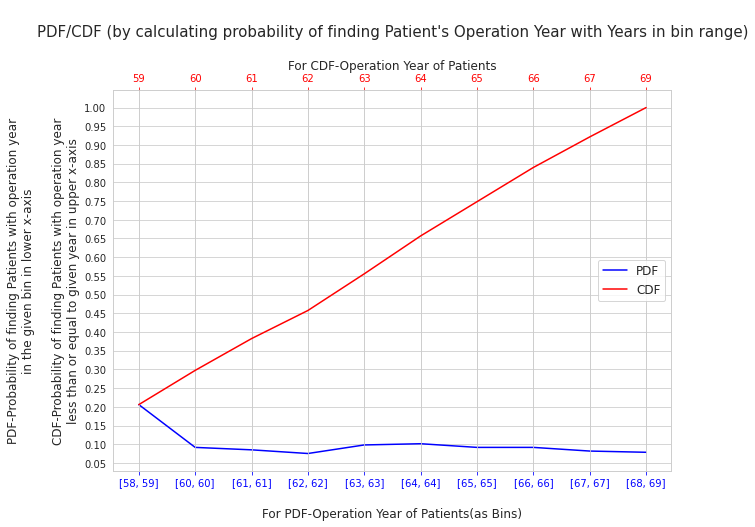

In [ ]:
counts, bin_edges = np.histogram(df.operation_Year, bins=10, density = False)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(bin_edges[1:],pdf,label='PDF',color='blue')
plt.xticks(bin_edges[1:], labels=[[int(bin_edges[0]), int(bin_edges[1])]] + [[int(bin_edges[i]+1), int(bin_edges[i+1])] for i in range(1,len(bin_edges)-1)])
plt.yticks(np.arange(0,1.2,0.05))
ax1.tick_params(axis='x',colors='blue')
plt.xlabel('\nFor PDF-Operation Year of Patients(as Bins)',fontsize=12)
plt.ylabel('PDF-Probability of finding Patients with operation year\nin the given bin in lower x-axis\n\nCDF-Probability of finding Patients with operation year\nless than or equal to given year in upper x-axis',fontsize=12)

ax2 = ax1.twiny()  # https://www.tutorialspoint.com/how-do-i-plot-multiple-x-or-y-axes-in-matplotlib
ax2.plot(bin_edges[1:], cdf,label='CDF',color='red')
plt.xticks(bin_edges[1:],[int(a) for a in bin_edges[1:]])
ax2.tick_params(axis='x',colors='red')
plt.xlabel('For CDF-Operation Year of Patients',fontsize=12)

plt.title("\nPDF/CDF (by calculating probability of finding Patient's Operation Year with Years in bin range)\n",fontsize=15)

pdf_line = mlines.Line2D([], [], color='blue', label='PDF')   # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
cdf_line = mlines.Line2D([], [], color='red', label='CDF')                          
plt.legend(handles=[pdf_line,cdf_line],loc=7,fontsize=12)

plt.show()

<font color='red'>**Observation:**</font>
1.   After year 1960, every year has average 10% of total patients.

2. About 20% patients have been operated in year 1958 & 1959.

3. This feature is closely uniform.

Analysing No. of Nodes:

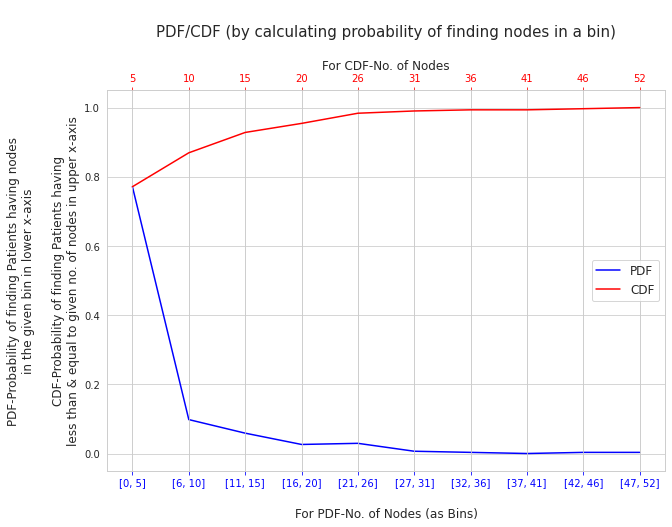

In [ ]:
counts, bin_edges = np.histogram(df.axil_nodes, bins=10, density = False)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(bin_edges[1:],pdf,label='PDF',color='blue')
plt.xticks(bin_edges[1:], labels=[[0, 5]] + [[int(bin_edges[i]+1), int(bin_edges[i+1])] for i in range(1,len(bin_edges)-1)])
ax1.tick_params(axis='x',colors='blue')
plt.xlabel('\nFor PDF-No. of Nodes (as Bins)',fontsize=12)
plt.ylabel('PDF-Probability of finding Patients having nodes\nin the given bin in lower x-axis\n\nCDF-Probability of finding Patients having\nless than & equal to given no. of nodes in upper x-axis',fontsize=12)

ax2 = ax1.twiny()  # https://www.tutorialspoint.com/how-do-i-plot-multiple-x-or-y-axes-in-matplotlib
ax2.plot(bin_edges[1:], cdf,label='CDF',color='red')
plt.xticks(bin_edges[1:],[int(a) for a in bin_edges[1:]])
ax2.tick_params(axis='x',colors='red')
plt.xlabel('For CDF-No. of Nodes',fontsize=12)

plt.title('\nPDF/CDF (by calculating probability of finding nodes in a bin)\n',fontsize=15)

pdf_line = mlines.Line2D([], [], color='blue', label='PDF')   # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
cdf_line = mlines.Line2D([], [], color='red', label='CDF')                          
plt.legend(handles=[pdf_line,cdf_line],loc=7,fontsize=12)

plt.show()

<font color='red'>**Observation:**</font>

1. Most of the patients(about 80%) have low no. of nodes(<5).

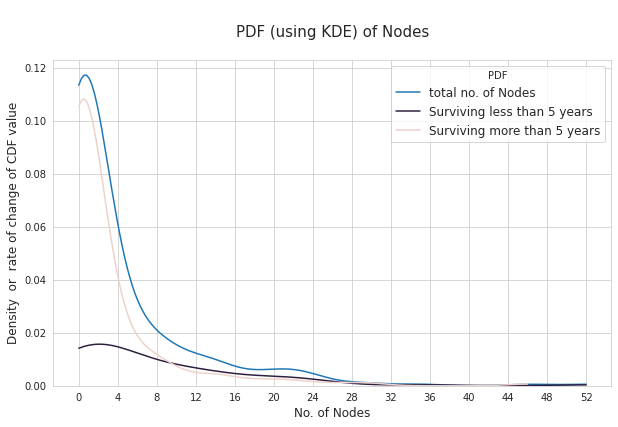

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.axil_nodes,cut=0)
ax2=sns.kdeplot(df.axil_nodes,hue=df.survival_status, cut=0)
plt.xlabel('No. of Nodes', fontsize=12)
plt.xticks(np.arange(0,53,4))
plt.ylabel('Density  or  rate of change of CDF value', fontsize=12)
plt.legend([ax1,ax2],labels=['total no. of Nodes','Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=12, title='PDF')
plt.title('\nPDF (using KDE) of Nodes\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of the Patients have low no. of nodes.
2. Most of them have survival status of more than 5 years.

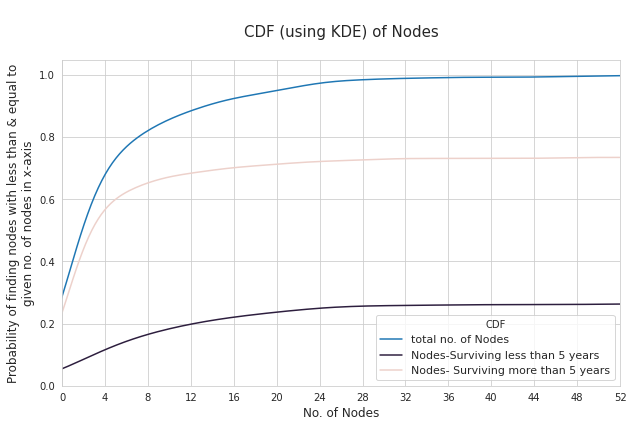

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.axil_nodes, cumulative=True)
ax2=sns.kdeplot(df.axil_nodes,hue=df.survival_status,cumulative=True)
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('Probability of finding nodes with less than & equal to\ngiven no. of nodes in x-axis', fontsize=12)
plt.legend([ax1,ax2],labels=['total no. of Nodes','Nodes-Surviving less than 5 years', 'Nodes- Surviving more than 5 years'], fontsize=11,title='CDF')
plt.title('\nCDF (using KDE) of Nodes\n',fontsize=15)
plt.xticks(np.arange(0,53,4))
plt.xlim(0,52)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of the Patients have low no. of nodes.
2. Most of them have survival status of more than 5 years.

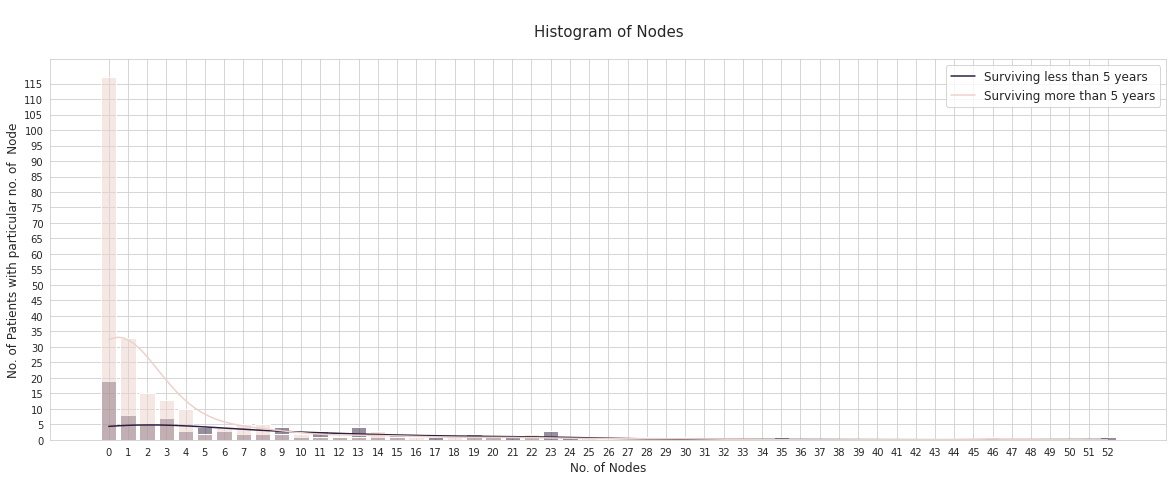

In [ ]:
plt.figure(figsize=(20,7))
sns.histplot(x=df.axil_nodes , hue=df.survival_status , kde=True , binwidth=1 , shrink=.8 ,discrete=True)
plt.xticks(np.arange(df.axil_nodes.min(),df.axil_nodes.max()+1))
plt.yticks(np.arange(0,120,5))
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('No. of Patients with particular no. of  Node', fontsize=12)
plt.legend(labels=['Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=12)
plt.title('\nHistogram of Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>


1. Most of the patients have low node value and most of them have survived more than 5 years.

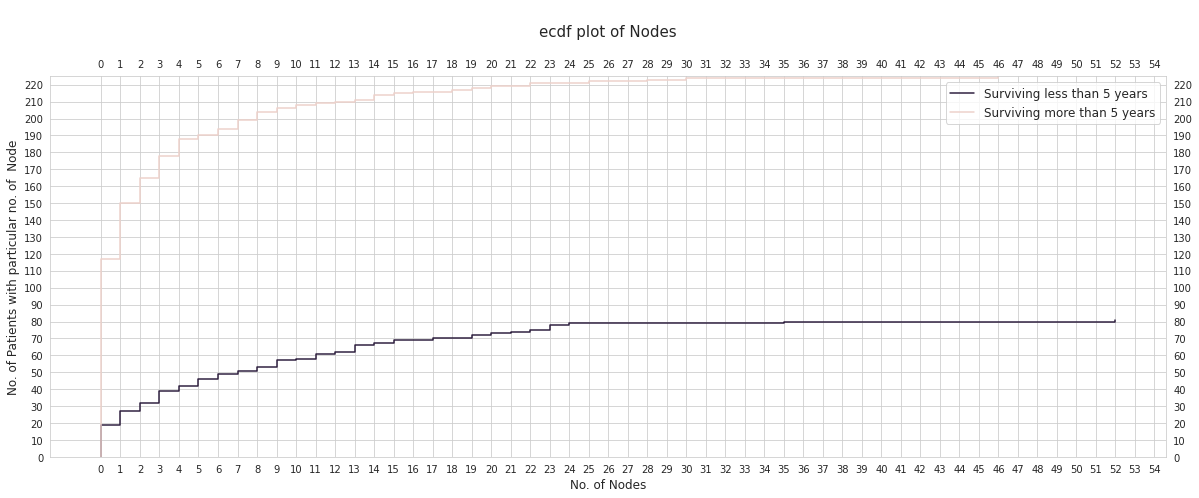

In [ ]:
plt.figure(figsize=(20,7))
sns.ecdfplot(x=df.axil_nodes,hue=df.survival_status,stat='count')
plt.xticks(np.arange(0,55))
plt.yticks(np.arange(0,230,10))
plt.tick_params(labeltop=True, labelright=True) # https://stackoverflow.com/a/12651723
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('No. of Patients with particular no. of  Node', fontsize=12)
plt.legend(labels=['Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=12)
plt.title('\necdf plot of Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>


1. Most of the patients have low node value and most of them have survived more than 5 years.

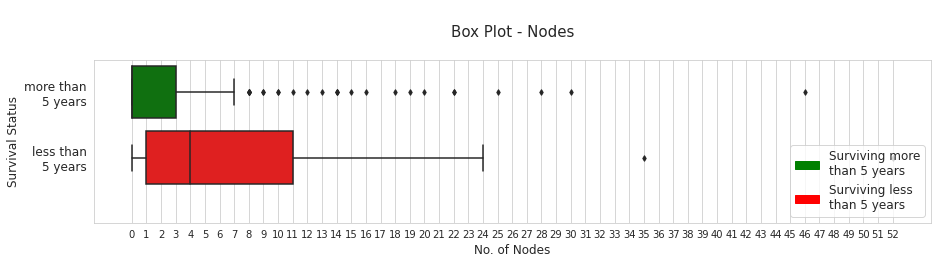

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(y=df.survival_status, x=df.axil_nodes,fliersize=4,orient='h', palette=['g','r'])
plt.xticks(np.arange(0,53))
plt.yticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('Survival Status', fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years') # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch], loc=4, fontsize=12)
plt.title('\nBox Plot - Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of patients having survival status=1 have node value of 0 or 1.


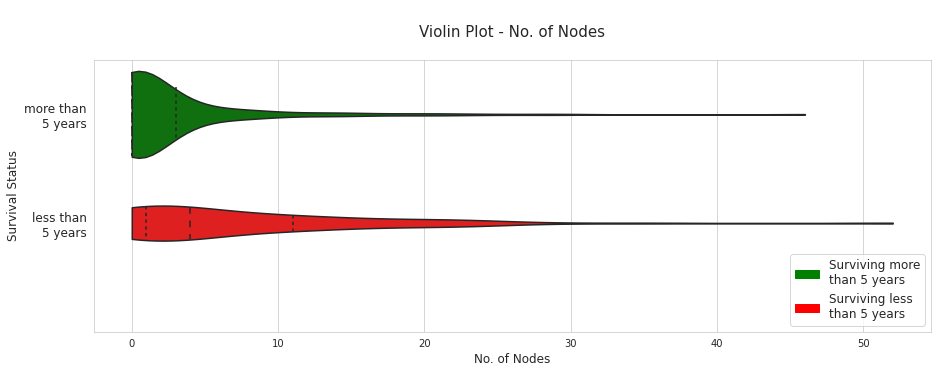

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df.survival_status, x=df.axil_nodes, inner='quartile', orient='h' ,cut=0, palette=['g','r'])
plt.yticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('Survival Status', fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years') # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch], loc=4, fontsize=12)
plt.title('\nViolin Plot - No. of Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of patients having survival status=1 have node value of 0 or 1.

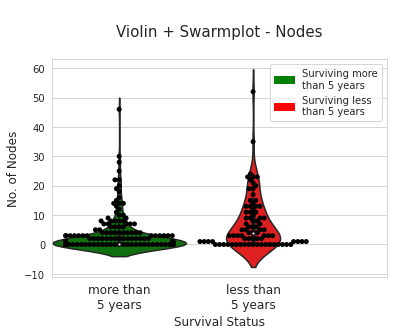

In [ ]:
sns.swarmplot(x=df.survival_status,y=df.axil_nodes,color='black')
sns.violinplot(x=df.survival_status,y=df.axil_nodes,width=1, palette=['g','r'])
plt.ylabel('No. of Nodes',fontsize=12)
plt.xlabel('Survival Status', fontsize=12)
plt.xticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years')
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch])
plt.title('\nViolin + Swarmplot - Nodes\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of patients having survival status=1 have node value of 0 or 1.

Below performing chi-square test by dividing data into two categories [node=(0 or 1) & node>1] to find whether survival status is dependent on this two category.

In [ ]:
len(df[df.axil_nodes<2])

177

In [ ]:
obs_axil_nodes , p_value_node = chi_square_test( df[df.axil_nodes<2] )
print('observed frequency:\n',obs_axil_nodes,'\n')
print('p-value:',p_value_node*100,'%')

observed frequency:
 [[150  75]
 [ 27  54]] 

p-value: 3.809323491627951e-05 %


In [ ]:
survival_rate_node, ci1_node, ci2_node = confidence_interval(df[df.axil_nodes<2])

print('survival rate:',survival_rate_node,'% with 95% C.I[',ci1_node, '-', ci2_node,']')

survival rate: 84.75 % with 95% C.I[ 79.1 - 89.83 ]


<font color='red'>**Observation:**</font>

1. Considering only node feature we have enough evidence to say that patients having low number of nodes(0&1) have better chance of survival (survival rate: 84.75 % with 95% C.I[ 79.1 - 89.83 ], p-value = 3.809e-05 %).

2. Confidence interval range is somewhat better as we have 177 observation out of 306 to support our claim.

Below we plot various bivariante plots of age & nodes and perform statistical test taking into account both age and nodes to make better inference from data.

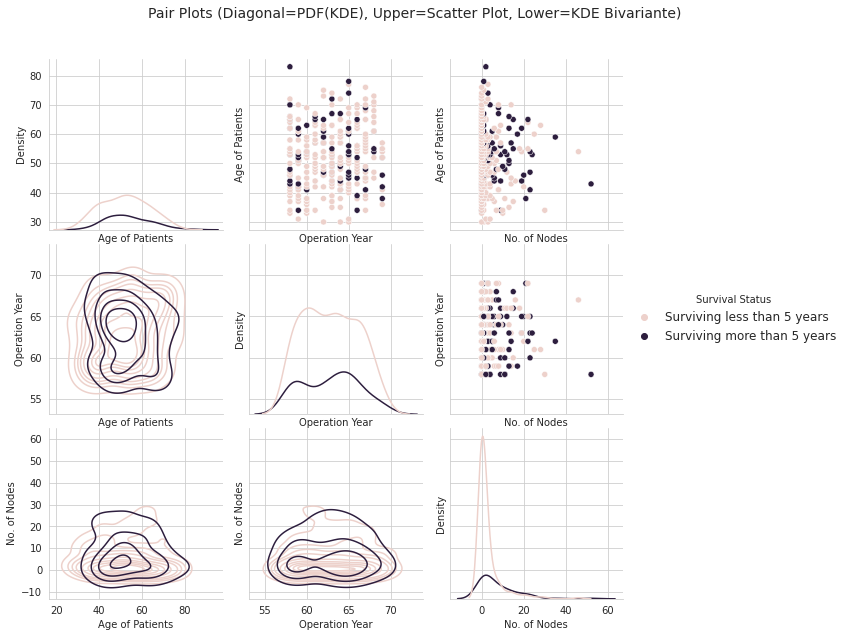

In [ ]:
g = sns.PairGrid(df,hue='survival_status',height=3)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

ax = g.axes.flat
for i in range(len(g.axes.flat)):
  if i==0 or i==3 or i==6:
    plt.setp(ax[i].set(**{'xlabel':'Age of Patients'}), visible=True)  # https://stackoverflow.com/questions/39352563/how-to-add-x-axis-labels-to-every-plot-in-a-seaborn-figure-level-plot
  if i==1 or i==4 or i==7:
    plt.setp(ax[i].set(**{'xlabel':'Operation Year'}), visible=True)
  if i==2 or i==5 or i==8:
    plt.setp(ax[i].set(**{'xlabel':'No. of Nodes'}), visible=True)
  if i==1 or i==2:
    plt.setp(ax[i].set(**{'ylabel':'Age of Patients'}), visible=True)
  if i==3 or i==5:
    plt.setp(ax[i].set(**{'ylabel':'Operation Year'}), visible=True)
  if i==6 or i==7:
    plt.setp(ax[i].set(**{'ylabel':'No. of Nodes'}), visible=True)
  if i==0 or i==4 or i==8:
    plt.setp(ax[i].set(**{'ylabel':'Density'}), visible=True)

hands,_=ax[1].get_legend_handles_labels()
g.add_legend(title='Survival Status',**{'handles':hands,'labels':['Surviving less than 5 years', 'Surviving more than 5 years'], 'fontsize':12})

plt.subplots_adjust(top=0.9)
plt.suptitle('Pair Plots (Diagonal=PDF(KDE), Upper=Scatter Plot, Lower=KDE Bivariante)', fontsize = 14) # https://stackoverflow.com/questions/52096050/seaborn-title-position

plt.show()

<font color='red'>**Observation:**</font>

1. The above pair plot shows bivariante plots between every pair of features and univariate kde plot in diagonal.
2. Observation of above plots are individually noted before and after this pairplots.

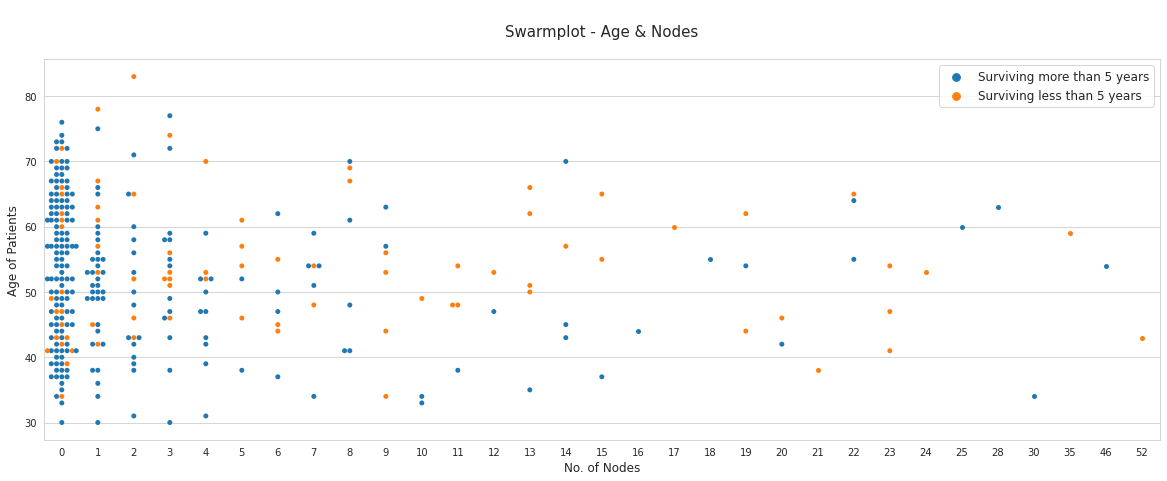

In [ ]:
plt.figure(figsize=(20,7))
ax=sns.swarmplot(x=df.axil_nodes,y=df.age,hue=df.survival_status)
plt.xlabel('No. of Nodes', fontsize=12)
plt.ylabel('Age of Patients', fontsize=12)
hands, _ = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Surviving more than 5 years', 'Surviving less than 5 years'], fontsize=12)
plt.title('\nSwarmplot - Age & Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of data points are for low node values and most of low node value patients show survival status=1.

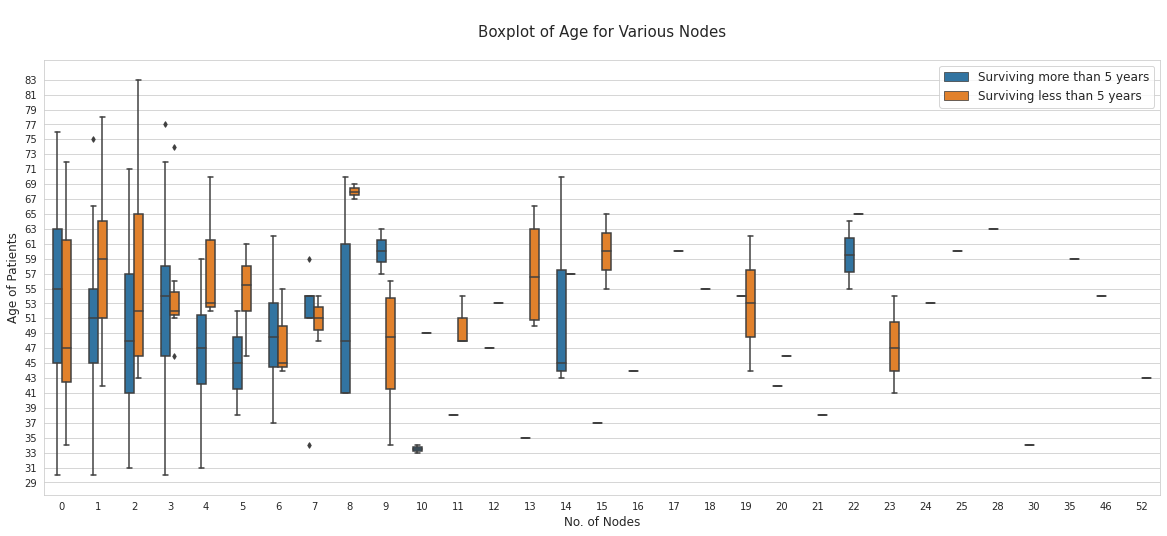

In [ ]:
plt.figure(figsize=(20,8))
ax=sns.boxplot(x='axil_nodes',y='age', hue='survival_status', data=df,width=.5,fliersize=4)
plt.yticks(np.arange(29,84,2))
plt.ylabel('Age of Patients', fontsize=12)
plt.xlabel('No. of Nodes', fontsize=12)
hands, _ = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Surviving more than 5 years', 'Surviving less than 5 years'], fontsize=12)
plt.title('\nBoxplot of Age for Various Nodes\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. Most of nodes have overlap of age data.

2. Most of more than 25 percentile node data (or IQR range) belong to age more than 43.

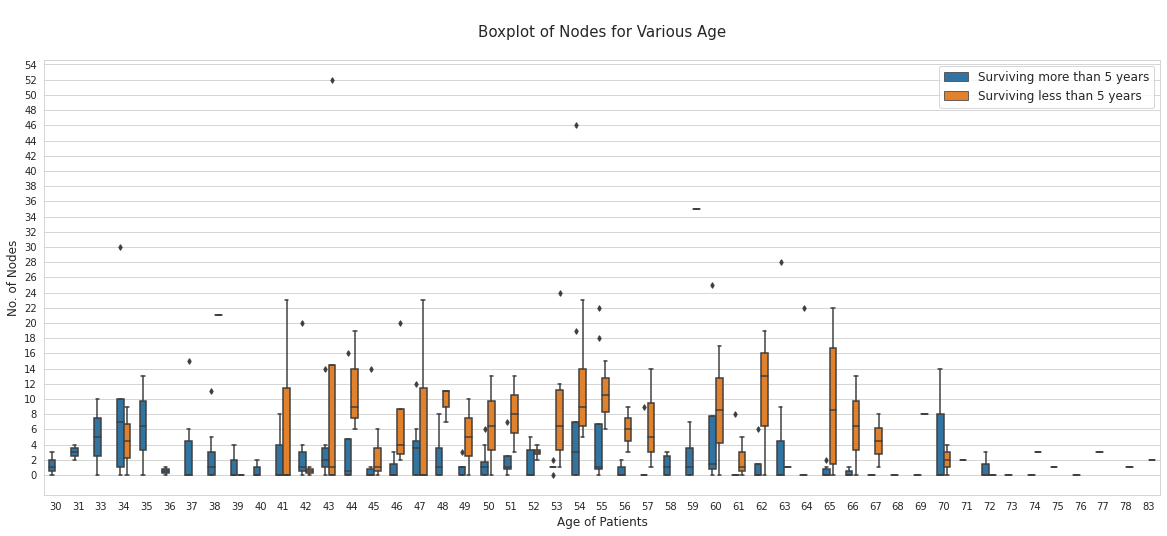

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='age',y='axil_nodes', hue='survival_status', data=df,width=.6,fliersize=4)
plt.yticks(np.arange(0,55,2))
plt.ylabel('No. of Nodes', fontsize=12)
plt.xlabel('Age of Patients', fontsize=12)
hands, _ = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Surviving more than 5 years', 'Surviving less than 5 years'], fontsize=12)
plt.title('\nBoxplot of Nodes for Various Age\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

1. low age group have fewer survival status=2 patients.

2. In high age group, some age are seperable by nodes while some have overlap.

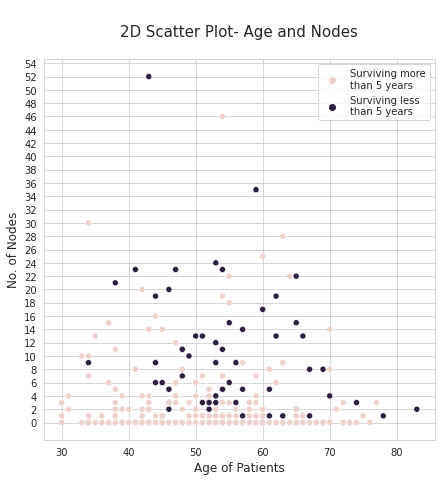

In [ ]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x=df.age, y=df.axil_nodes , hue=df.survival_status)
plt.yticks(np.arange(0,55,2))
plt.ylabel('No. of Nodes', fontsize=12)
plt.xlabel('Age of Patients', fontsize=12)
hands,_=ax.get_legend_handles_labels()
plt.legend(handles=hands,labels=['Surviving more\nthan 5 years', 'Surviving less\nthan 5 years'], fontsize=10)
plt.title('\n2D Scatter Plot- Age and Nodes\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>

- Consider above scatter plot of age and nodes

- We divide data into four groups such that each value in observed frequency table is >=5 so that we can perform chi-square test.

 1. group 1- low age(<43) & less nodes(<5)

 2. group 2- high age(>=43) & more nodes(>5)

 3. group 3- high age(>=43) & less nodes(<5)

 4. group 2- low age(<45) & more nodes(>7)


- We perform chi-square test on each set.

In [ ]:
obs1 , p_value1 = chi_square_test( df[df.axil_nodes<5][df.age<43] )

print('observed frequency:\n',obs1,'\n')
print('p-value:',p_value1*100,'%')

observed frequency:
 [[ 41 184]
 [  6  75]] 

p-value: 3.2751320189317785 %


In [ ]:
survival_rate1, ci1_1, ci2_1 = confidence_interval(df[df.axil_nodes<5][df.age<43])

print('group-1 survival rate:',survival_rate1,'% with 95% C.I[',ci1_1, '-', ci2_1,']')

group-1 survival rate: 87.23 % with 95% C.I[ 76.6 - 95.74 ]


<font color='red'>**Observation:**</font>

1. We get p-value=3.27%

2. If we consider conservative p-value of 1% we can say that we dont have enough evidence from data to conclude that survival status is dependent on group-1 as a category (low age(<43) & less nodes(<5))

3. If we consider less conservative p-value we can say that we have enough evidence from data to conclude that survival status is dependent on group-1 as a category

4. if less conservative p-value is considered then we can say that-

- **Patients with less age(<43)and low nodes(<5) have survival rate of 87.23 % with 95% C.I[ 76.60 - 95.74 ] , p-value=3.27 %.**

In [ ]:
obs2 , p_value2 = chi_square_test( df[df.axil_nodes>5][df.age>42] )

print('observed frequency:\n',obs2,'\n')
print('p-value:',p_value2*100,'%')

observed frequency:
 [[ 32 193]
 [ 24  57]] 

p-value: 0.3642700745831155 %


In [ ]:
survival_rate2, ci1_2, ci2_2 = confidence_interval(df[df.axil_nodes>5][df.age>42])

print('group-2 survival rate:',survival_rate2,'% with 95% C.I[',ci1_2, '-', ci2_2,']')

group-2 survival rate: 42.86 % with 95% C.I[ 30.36 - 57.14 ]


<font color='red'>**Observation:**</font>

1. We get p-value= 0.36%

2. We have enough evidence from data with a high statistical significance that survival status is dependent on group-2 as a category (high age(>=43) & more nodes(>5)).

- **Patients with high age(>42)and high nodes(>5) have survival rate of 42.86 % with 95% C.I[ 30.36 - 57.14 ] , p-value=0.36 %.**

In [ ]:
obs3 , p_value3 = chi_square_test( df[df.axil_nodes<5][df.age>42] )

print('observed frequency:\n',obs3,'\n')
print('p-value:',p_value3*100,'%')

observed frequency:
 [[147  78]
 [ 36  45]] 

p-value: 0.16002701253012966 %


In [ ]:
survival_rate3, ci1_3, ci2_3 = confidence_interval(df[df.axil_nodes<5][df.age>42])

print('group-3 survival rate:',survival_rate3,'% with 95% C.I[',ci1_3, '-', ci2_3,']')

group-3 survival rate: 80.33 % with 95% C.I[ 74.86 - 86.34 ]


<font color='red'>**Observation:**</font>

1. We get p-value= 0.16%

2. We have enough evidence from data with a high statistical significance that survival status is dependent on group-3 as a category (age(>=43) & less nodes(<5)).

- **Patients with high age(>42)and less nodes(<5) have survival rate of 80.33 % with 95% C.I[ 74.86 - 86.34 ] , p-value=0.16 %.**

- **This group have better and tight C.I compared to others as this group have high concentration of data points as can be seen in plots plotted above.**

In [ ]:
obs4 , p_value4 = chi_square_test( df[df.axil_nodes>7][df.age<45] )

print('observed frequency:\n',obs4,'\n')
print('p-value:',p_value4*100,'%')

observed frequency:
 [[ 11 214]
 [  6  75]] 

p-value: 57.16076449533314 %


<font color='red'>**Observation:**</font>

1. We get p-value= 57.16%.

2. We do not have enough evidence from data to conclude that survival status is dependent on group-4 as a category (low age(<45) & more nodes(>7)).

- **Nothing confidently can be said about the survival status of patients having low age(<45) and high node(>7).**

In [ ]:
data = [
    ['Any age', 'Less than 2' , survival_rate_node, [ ci1_node , ci2_node ] , p_value_node*100 , 'Very High'],
    ['Less than 42', 'Any no. of nodes' , survival_rate_age, [ ci1_age , ci2_age ] , p_value_age*100 , 'Low'],
    ['Less than 43', 'Less than 5' , survival_rate1, [ ci1_1 , ci2_1 ] , p_value1*100 , 'Low'],
    ['More than 42', 'More than 5' , survival_rate2, [ci1_2 , ci2_2] , p_value2*100 , 'High'],
    ['More than 42', 'Less than 5' , survival_rate3, [ci1_3 , ci2_3] , p_value3*100 , 'Very High'],
    ['Less than 45', 'More than 7' , 'Irrelevent', 'Very high p-value' , p_value4*100 , 'Not Confident' ]
      ]
conclusion_table = pd.DataFrame(data, columns=['Age', 'Nodes', 'Survival rate(%)', 'Confidence Interval(%)', 'P-value(%)', 'Confidence Level'])

# <font color='red'>**Overall Conclusion-**</font>

1. Considering only 'No. of Nodes' as a feature, we can conclude with high level of confidence that patients with low node value(<2) have very good chances of survival (Survival rate = 84.75 % with 95% C.I [ 79.1 - 89.83 ] ).
2. Considering only 'Age' as a feature, we can conclude but with less confidence that low age patients(age<42) have good chances of survival (Survival rate: 86.79 % with 95% C.I [ 77.36 - 94.34 ] ).
1. Patients with Less no. of Nodes(<5) have high chance of survival with-
  - High age group patients(age>42) having survival rate of 80.33% , C.I.[74.86 - 86.34] , p-value=0.16%. (this conclusion can be confidently quoted).
  - Low age group patients(age<43) having survival status of 87.23% , C.I.[76.6 - 95.74] , p-value=3.27%. (this conclusion have low level of confidence).

2. Patients with High no. of Nodes(>5) have low survival rate with-
  - High age group patients(age>42) having low survival rate of 42.86%, C.I.[30.36 - 57.14], p-value=0.36%. (this conclusion can be confidently quoted.).
  - for Low age group(age<45) having high no. of nodes, data does not give any highly confident conclusion (nothing relevent can be said from data for such patients).

3. Below table gives summary of above values.

In [ ]:
conclusion_table 

,Age,Nodes,Survival rate(%),Confidence Interval(%),P-value(%),Confidence Level
0,Any age,Less than 2,84.75,"[79.1, 89.83]",0.000038,Very High
1,Less than 42,Any no. of nodes,86.79,"[77.36, 94.34]",2.536782,Low
2,Less than 43,Less than 5,87.23,"[76.6, 95.74]",3.275132,Low
3,More than 42,More than 5,42.86,"[30.36, 57.14]",0.364270,High
4,More than 42,Less than 5,80.33,"[74.86, 86.34]",0.160027,Very High
5,Less than 45,More than 7,Irrelevent,Very high p-value,57.160764,Not Confident


***********************************************

********************************************************

********************************************************

********************************************************

**Other plots:**

Age:

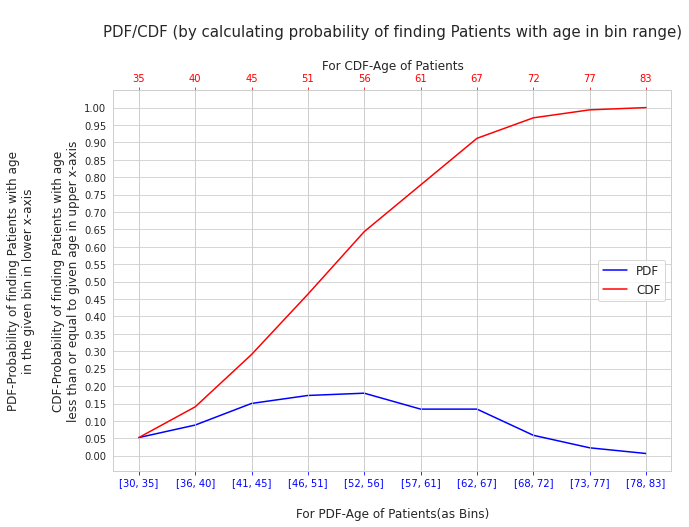

In [ ]:
counts, bin_edges = np.histogram(df.age, bins=10, density = False)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(bin_edges[1:],pdf,label='PDF',color='blue')
plt.xticks(bin_edges[1:], labels=[[int(bin_edges[0]), int(bin_edges[1])]] + [[int(bin_edges[i]+1), int(bin_edges[i+1])] for i in range(1,len(bin_edges)-1)])
plt.yticks(np.arange(0,1.2,0.05))
ax1.tick_params(axis='x',colors='blue')
plt.xlabel('\nFor PDF-Age of Patients(as Bins)',fontsize=12)
plt.ylabel('PDF-Probability of finding Patients with age\nin the given bin in lower x-axis\n\nCDF-Probability of finding Patients with age\nless than or equal to given age in upper x-axis',fontsize=12)

ax2 = ax1.twiny()  # https://www.tutorialspoint.com/how-do-i-plot-multiple-x-or-y-axes-in-matplotlib
ax2.plot(bin_edges[1:], cdf,label='CDF',color='red')
plt.xticks(bin_edges[1:],[int(a) for a in bin_edges[1:]])
ax2.tick_params(axis='x',colors='red')
plt.xlabel('For CDF-Age of Patients',fontsize=12)

plt.title('\nPDF/CDF (by calculating probability of finding Patients with age in bin range)\n',fontsize=15)

pdf_line = mlines.Line2D([], [], color='blue', label='PDF')   # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
cdf_line = mlines.Line2D([], [], color='red', label='CDF')                          
plt.legend(handles=[pdf_line,cdf_line],loc=7,fontsize=12)

plt.show()

<font color='red'>**Observation:**</font>
1.   We cannot find any meaningful insight.

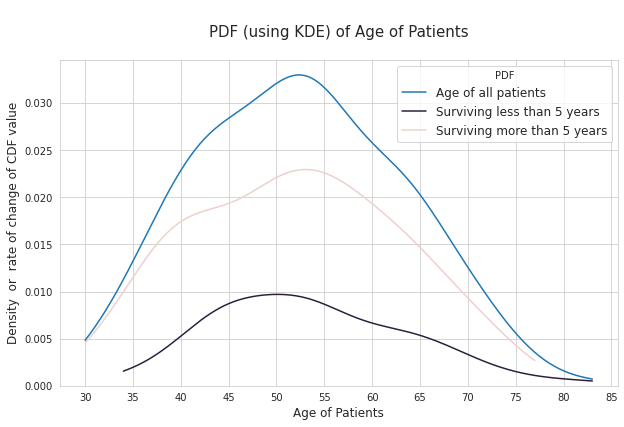

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.age,cut=0)
ax2=sns.kdeplot(df.age,hue=df.survival_status, cut=0)
plt.xlabel('Age of Patients', fontsize=12)
plt.xticks(np.arange(30,86,5))
plt.ylabel('Density  or  rate of change of CDF value', fontsize=12)
plt.legend([ax1,ax2],labels=['Age of all patients','Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=12, title='PDF')
plt.title('\nPDF (using KDE) of Age of Patients\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>
1.   We have more patients with survival more than 5 years as area under pdf is more.


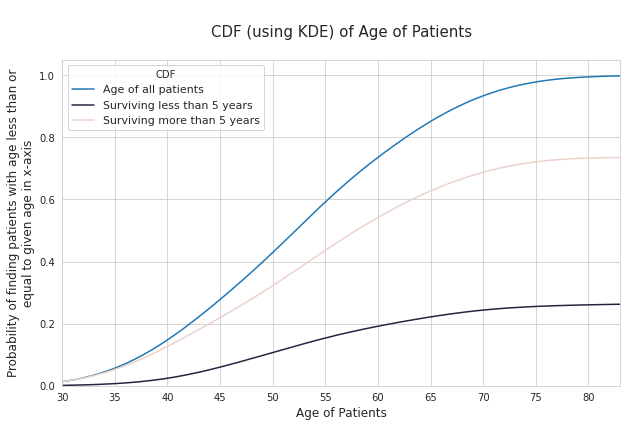

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.age, cumulative=True)
ax2=sns.kdeplot(df.age,hue=df.survival_status,cumulative=True)
plt.xlabel('Age of Patients', fontsize=12)
plt.ylabel('Probability of finding patients with age less than or\nequal to given age in x-axis', fontsize=12)
plt.legend([ax1,ax2],labels=['Age of all patients','Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=11,title='CDF')
plt.title('\nCDF (using KDE) of Age of Patients\n',fontsize=15)
plt.xticks(np.arange(30,86,5))
plt.xlim(30,83)
plt.show()

<font color='red'>**Observation:**</font>
1.   About 73%  data belong to survival status =1 patients.

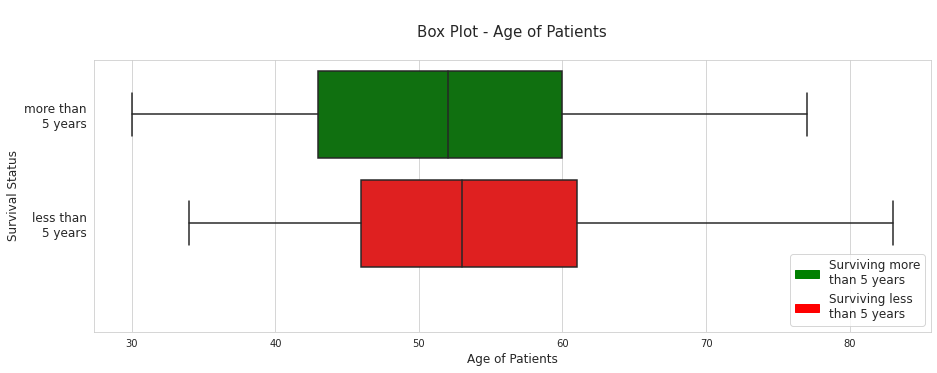

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df.survival_status, x=df.age,fliersize=4,orient='h', palette=['g','r'])
plt.yticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
plt.xlabel('Age of Patients', fontsize=12)
plt.ylabel('Survival Status', fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years') # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch], loc=4, fontsize=12)
plt.title('\nBox Plot - Age of Patients\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>



1.   We cannot make any meaningful observation from Box plot of Age.


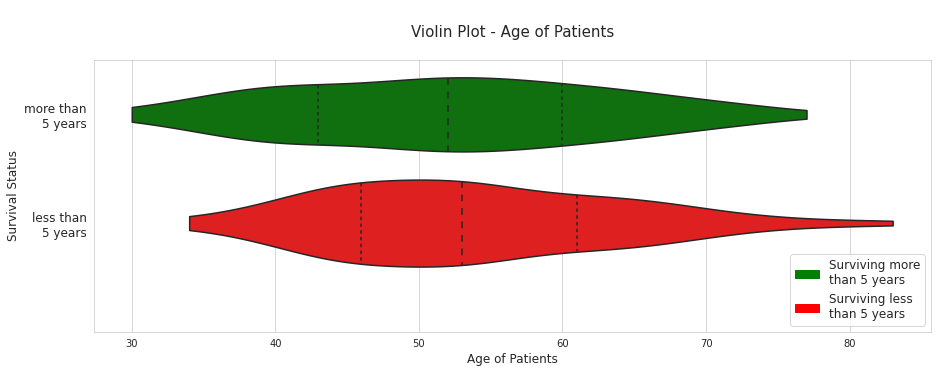

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df.survival_status, x=df.age, inner='quartile', orient='h' ,cut=0, palette=['g','r'])
plt.yticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
plt.xlabel('Age of Patients', fontsize=12)
plt.ylabel('Survival Status', fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years') # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch], loc=4, fontsize=12)
plt.title('\nViolin Plot - Age of Patients\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>



1.   We cannot make any meaningful observation from Violin plot of Age.



Operation Year:

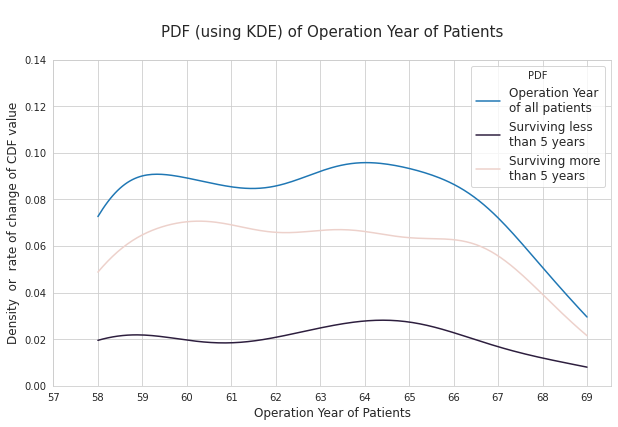

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.operation_Year,cut=0)
ax2=sns.kdeplot(df.operation_Year,hue=df.survival_status, cut=0)
plt.xlabel('Operation Year of Patients', fontsize=12)
plt.xticks(np.arange(57,70))
plt.yticks(np.arange(0,0.16,0.02))
plt.ylabel('Density  or  rate of change of CDF value', fontsize=12)
plt.legend([ax1,ax2],labels=['Operation Year\nof all patients','Surviving less\nthan 5 years', 'Surviving more\nthan 5 years'], fontsize=12, title='PDF')
plt.title('\nPDF (using KDE) of Operation Year of Patients\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>
1.   We see uniform pattern for both survival status class.

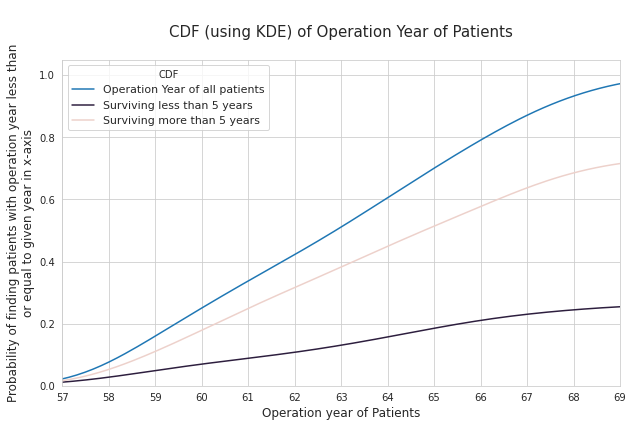

In [ ]:
plt.figure(figsize=(10,6))
ax1=sns.kdeplot(df.operation_Year, cumulative=True)
ax2=sns.kdeplot(df.operation_Year,hue=df.survival_status,cumulative=True)
plt.xlabel('Operation year of Patients', fontsize=12)
plt.ylabel('Probability of finding patients with operation year less than\nor equal to given year in x-axis', fontsize=12)
plt.legend([ax1,ax2],labels=['Operation Year of all patients','Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=11,title='CDF')
plt.title('\nCDF (using KDE) of Operation Year of Patients\n',fontsize=15)
plt.xticks(np.arange(57,70))
plt.xlim(57,69)
plt.show()

<font color='red'>**Observation:**</font>
1.   No meaningful insight can be drawn.

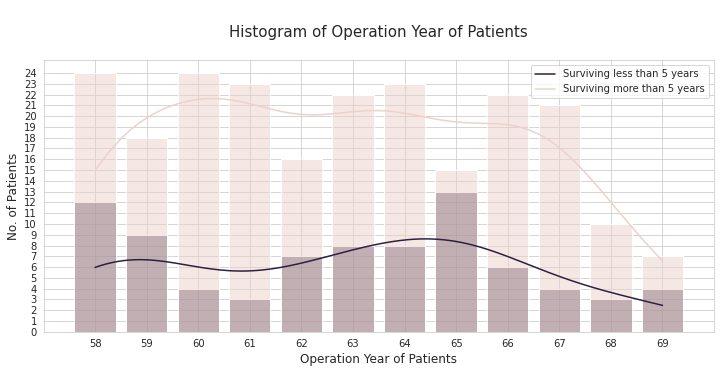

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(x=df.operation_Year , hue=df.survival_status , kde=True , binwidth=1 , shrink=.8 ,discrete=True)
plt.xticks(np.arange(58,70))
plt.yticks(np.arange(0,25))
plt.xlabel('Operation Year of Patients', fontsize=12)
plt.ylabel('No. of Patients', fontsize=12)
plt.legend(labels=['Surviving less than 5 years', 'Surviving more than 5 years'], fontsize=10)
plt.title('\nHistogram of Operation Year of Patients\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>



1.   We cannot make any meaningful observation.


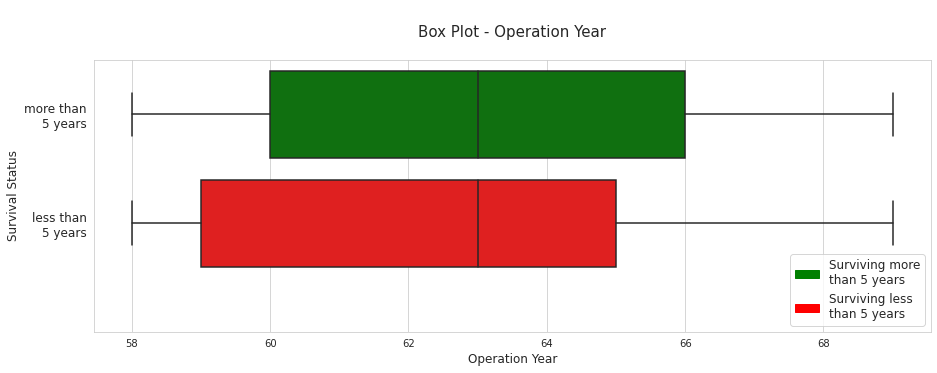

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df.survival_status, x=df.operation_Year,fliersize=4,orient='h', palette=['g','r'])
plt.yticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
plt.xlabel('Operation Year', fontsize=12)
plt.ylabel('Survival Status', fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years') # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch], loc=4, fontsize=12)
plt.title('\nBox Plot - Operation Year\n', fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>



1.   We cannot make any meaningful observation.


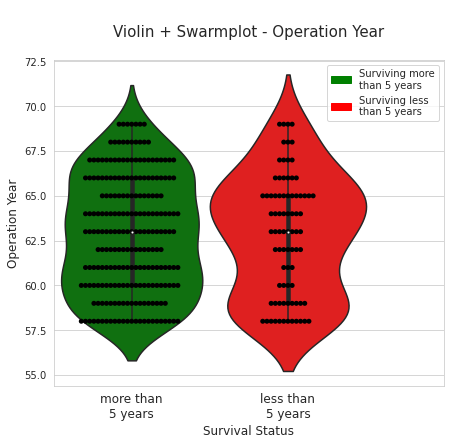

In [ ]:
plt.figure(figsize=(7,6))
sns.swarmplot(x=df.survival_status,y=df.operation_Year,color='black')
sns.violinplot(x=df.survival_status,y=df.operation_Year,width=1, palette=['g','r'])
plt.ylabel('Operation Year',fontsize=12)
plt.xlabel('Survival Status', fontsize=12)
plt.xticks([0,1,2],labels=['more than\n5 years' , 'less than\n5 years'], fontsize=12)
green_patch = mpatches.Patch(color='green', label='Surviving more\nthan 5 years')
red_patch = mpatches.Patch(color='red', label='Surviving less\nthan 5 years')
plt.legend(handles=[green_patch,red_patch],fontsize=10)
plt.title('\nViolin + Swarmplot - Operation Year\n',fontsize=15)
plt.show()

<font color='red'>**Observation:**</font>



1.   We cannot make any meaningful observation.
